In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data.csv', encoding='latin1')

/tmp/ipython-input-1436724941.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data.csv', encoding='latin1')


In [ ]:
print(df.head())



  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3       

In [ ]:
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [ ]:
print(df.describe())

                 so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000


In [ ]:
x = df['no2'].dropna().values

In [ ]:
r = 102303048

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

z = x + a_r * np.sin(b_r * x)

In [ ]:
mu = np.mean(z)
sigma_sq = np.var(z)

lambda_val = 1 / (2 * sigma_sq)
c = 1 / np.sqrt(2 * np.pi * sigma_sq)

In [ ]:
print(f"Lambda: {lambda_val}")
print(f"Mu: {mu}")
print(f"c: {c}")

Lambda: 0.001460436525489001
Mu: 25.809622897811263
c: 0.021560876239314915


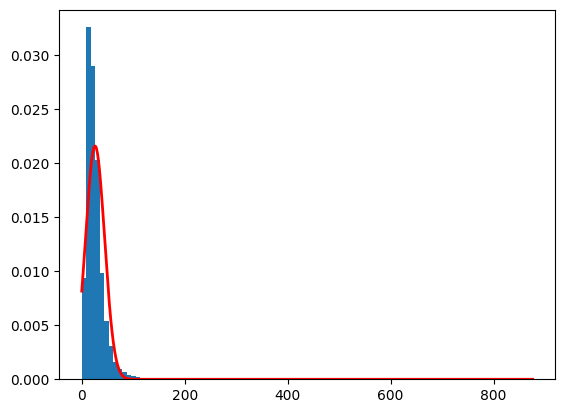

In [ ]:
plt.hist(z, bins=100, density=True)

z_vals = np.linspace(min(z), max(z), 1000)
p_z = c * np.exp(-lambda_val * (z_vals - mu)**2)

plt.plot(z_vals, p_z, 'r', linewidth=2)
plt.show()